In [1]:
# importing all needed libraries
import pandas as pd
import numpy as np

In [2]:
# importing all files to dataframe
employee_data =  pd.read_csv('employee_data.csv')
insurance_data =  pd.read_csv('insurance_data.csv')
vendor_data =  pd.read_csv('vendor_data.csv')

# Task  1 Merge the 3 dataset and create 1 view of data.

In [3]:
# merging insurance and employee data and creating new dataframe 'df1'
df1=pd.merge(insurance_data,employee_data, on = 'AGENT_ID', how='left')

In [4]:
# merging 'df1' with vendor dataframe
df_final=pd.merge(df1,vendor_data,on='VENDOR_ID', how="left")

In [5]:
# setting an index column to uniquely identify each row whenver needed
df_final.reset_index(inplace=True)

## Task 1 Result

In [6]:
# all three data combined in one single data frane
df_final.head(4)

,index,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,...,STATE_y,POSTAL_CODE_y,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
0,0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,...,TN,37217,35441155,LRZO53254369804934,Ramsey Inc,3114 West 20th Court,NaN,Panama City,FL,32405.0
1,1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,...,AZ,85301,44055451,XBYG14382904542874,"Morales, Campbell and Washington",42 West Louise Street,B,Fayetteville,AR,72701.0
2,2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,...,AL,36105,55770246,WRXH14597428306333,Johnson Ltd,2619 North Quality Lane,#315,Fayetteville,AR,72703.0
3,3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,...,OK,73071,87652976,YEPN16077902472499,Blackwell-Foster,3609 Meadow Drive,NaN,Nashville,TN,37215.0


In [7]:
# fixing the dataset

In [8]:
# checking for null values and for possible modification in dataframe
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     10000 non-null  int64  
 1   TXN_DATE_TIME             10000 non-null  object 
 2   TRANSACTION_ID            10000 non-null  object 
 3   CUSTOMER_ID               10000 non-null  object 
 4   POLICY_NUMBER             10000 non-null  object 
 5   POLICY_EFF_DT             10000 non-null  object 
 6   LOSS_DT                   10000 non-null  object 
 7   REPORT_DT                 10000 non-null  object 
 8   INSURANCE_TYPE            10000 non-null  object 
 9   PREMIUM_AMOUNT            10000 non-null  float64
 10  CLAIM_AMOUNT              10000 non-null  int64  
 11  CUSTOMER_NAME             10000 non-null  object 
 12  ADDRESS_LINE1_x           10000 non-null  object 
 13  ADDRESS_LINE2_x           1495 non-null   object 
 14  CITY_x 

In [9]:
# fixing the date time column datatype from object to datetime
df_final['REPORT_DT']=pd.to_datetime(df_final['REPORT_DT'])
df_final['POLICY_EFF_DT']=pd.to_datetime(df_final['POLICY_EFF_DT'])
df_final['LOSS_DT']=pd.to_datetime(df_final['LOSS_DT'])

In [10]:
# fixing the format 
df_final['LOSS_DT']=pd.to_datetime(df_final['LOSS_DT'],format='%d/%m/%y')

In [11]:
df_final['30_day_back']=df_final['LOSS_DT'] -  pd.to_timedelta(31, unit='d')

In [12]:
df_final[['LOSS_DT','30_day_back']]

,LOSS_DT,30_day_back
0,2020-05-16,2020-04-15
1,2020-05-13,2020-04-12
2,2020-05-21,2020-04-20
3,2020-05-14,2020-04-13
4,2020-05-17,2020-04-16
...,...,...
9995,2021-06-25,2021-05-25
9996,2021-06-12,2021-05-12
9997,2021-06-18,2021-05-18
9998,2021-06-16,2021-05-16


In [13]:
df_final.dtypes

index                                int64
TXN_DATE_TIME                       object
TRANSACTION_ID                      object
CUSTOMER_ID                         object
POLICY_NUMBER                       object
POLICY_EFF_DT               datetime64[ns]
LOSS_DT                     datetime64[ns]
REPORT_DT                   datetime64[ns]
INSURANCE_TYPE                      object
PREMIUM_AMOUNT                     float64
CLAIM_AMOUNT                         int64
CUSTOMER_NAME                       object
ADDRESS_LINE1_x                     object
ADDRESS_LINE2_x                     object
CITY_x                              object
STATE_x                             object
POSTAL_CODE_x                        int64
SSN                                 object
MARITAL_STATUS                      object
AGE                                  int64
TENURE                               int64
EMPLOYMENT_STATUS                   object
NO_OF_FAMILY_MEMBERS                 int64
RISK_SEGMEN

# Task 2

## top 3 Insurance Type where we are gettingmost insurance claims

In [14]:
# top 3 Insurace type acc to claim size
df_final.groupby('INSURANCE_TYPE').agg('size').reset_index(name="Total").sort_values(by ="Total", ascending= False).reset_index(drop=True).iloc[0:3]


,INSURANCE_TYPE,Total
0,Mobile,1692
1,Property,1692
2,Health,1690


# task3 

## Business Leader wants to find Top 5 States where we are getting most insurance claimsfor customer belonging to HIGH(H) risk segment?

In [15]:
# Getting all the values in risk column H = High, M = Medium, L = low
df_final['RISK_SEGMENTATION'].unique()

array(['L', 'M', 'H'], dtype=object)

In [16]:
# Getting the required query in new data frame
df_1=df_final[df_final['RISK_SEGMENTATION'] == 'H'].groupby('STATE_x').size().reset_index(name='Total').sort_values(by='Total', ascending=False).reset_index(drop=True)

In [17]:
df_1.index +=1   # starting the index with 1 

## Task 3 Result

<AxesSubplot:xlabel='STATE_x'>

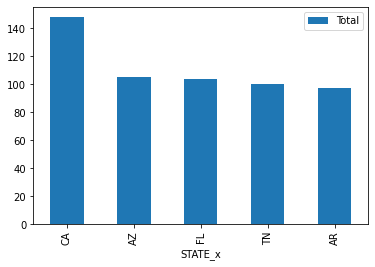

In [18]:
df_1.iloc[:5].plot(x='STATE_x',y='Total',kind='bar')

In [19]:
# Top 5 states
df_1.head(5)

,STATE_x,Total
1,CA,148
2,AZ,105
3,FL,104
4,TN,100
5,AR,97


# Task 4

Business wants to create a new variable “COLOCATION” which will have following values IF
Customer State == Incident State == Agent Address State THEN 1 ELSE 0
Find the mean of this new column

In [20]:
# Creating the new column with boolen values True or False
df_final['COLOCATION'] = df_final.apply(lambda x: x.STATE_x == x.INCIDENT_STATE == x.STATE_y, axis = 1)

In [21]:
# Changing the Boolen Vales to int type  either 1 or 0
df_final['COLOCATION']=df_final['COLOCATION'].apply(lambda x: 1 if x==True else 0)

## Task 4 Result

In [22]:
df_final[['CUSTOMER_ID','COLOCATION']].head(4)

,CUSTOMER_ID,COLOCATION
0,A00003822,0
1,A00008149,0
2,A00003172,0
3,A00007572,0


In [23]:
# Total No of 0 and 1 in 'COLOCATION' feature
df_final.groupby('COLOCATION').size()

COLOCATION
0    9956
1      44
dtype: int64

In [24]:
# finding mean of Column 'COLOCATION'
df_final['COLOCATION'].mean()

0.0044

# task 5 
Data entry error was detected in the data and you are required to correct it. If for any
claim transaction “AUTHORITY_CONTACTED” is NOT “Police” and POLICE_AVAILABLE == 1
Then Update “AUTHORITY_CONTACTED” to Police.

In [25]:
# View at the data having error
df_final[(df_final['AUTHORITY_CONTACTED']!='Police') & (df_final['POLICE_REPORT_AVAILABLE']==1)][['AUTHORITY_CONTACTED','POLICE_REPORT_AVAILABLE']]

,AUTHORITY_CONTACTED,POLICE_REPORT_AVAILABLE
5,Ambulance,1
10,Ambulance,1
11,Ambulance,1
12,None,1
16,Other,1
...,...,...
9991,None,1
9993,Ambulance,1
9995,Ambulance,1
9997,None,1


In [26]:
# updating the data with correction
df_final.loc[(df_final['AUTHORITY_CONTACTED']!='Police') & (df_final['POLICE_REPORT_AVAILABLE']==1),'AUTHORITY_CONTACTED'] ="Police"

In [83]:
## Task 5 Result

In [27]:
# Reverifing the data for error, No output confirms for not having any error
df_final[(df_final['AUTHORITY_CONTACTED']!='Police') & (df_final['POLICE_REPORT_AVAILABLE']==1)][['AUTHORITY_CONTACTED','POLICE_REPORT_AVAILABLE']]

,AUTHORITY_CONTACTED,POLICE_REPORT_AVAILABLE


## Task 6
Business wants to check the Claim Amount for deviation for each transaction, they would
like you to calculate as follow
CLAIM_DEVIATION = AVG_CLAIM_AMOUNT_FOR_LAST_30DAYS (same insurance type)
/ CURRENT_CLAIM_AMOUNT
If the value < 0.5 THEN CLAIM_DEVIATION = 1 ELSE 0
If there is less than 30 days of transaction history THEN
-1 Note: LAST_30DAYS does not include current day

In [28]:
temp=df_final[['TRANSACTION_ID','CUSTOMER_ID','INSURANCE_TYPE','LOSS_DT','CLAIM_AMOUNT','30_day_back']]
temp.reset_index(inplace=True)
temp.head(4)

,index,TRANSACTION_ID,CUSTOMER_ID,INSURANCE_TYPE,LOSS_DT,CLAIM_AMOUNT,30_day_back
0,0,TXN00000001,A00003822,Health,2020-05-16,9000,2020-04-15
1,1,TXN00000002,A00008149,Property,2020-05-13,26000,2020-04-12
2,2,TXN00000003,A00003172,Property,2020-05-21,13000,2020-04-20
3,3,TXN00000004,A00007572,Health,2020-05-14,16000,2020-04-13


In [29]:
# function acc to the condition
def CLAIM_DEVIATION_Calc(x):
    temp_df= temp.loc[(temp['LOSS_DT']<=temp['LOSS_DT'].iloc[temp.index[x]])  & (temp['LOSS_DT']>=temp['30_day_back'].iloc[temp.index[x]])]
    if temp_df.shape[0] == 30:
        avg = temp_df[temp_df['INSURANCE_TYPE']==temp['INSURANCE_TYPE'].iloc[temp.index[x]]]['CLAIM_AMOUNT'].mean()
        avg=avg/temp['CLAIM_AMOUNT'].iloc[temp.index[x]]
        if avg<0.5:
            return 1
        else:
            return 0
    elif temp_df.shape[0] > 30:
        temp_df=temp_df.iloc[0:30]
        avg = temp_df[temp_df['INSURANCE_TYPE']==temp['INSURANCE_TYPE'].iloc[temp.index[x]]]['CLAIM_AMOUNT'].mean()
        avg=avg/temp['CLAIM_AMOUNT'].iloc[temp.index[x]]
        if avg<0.5:
            return 1
        else:
            return 0
    else:
        return -1
    
    

In [30]:
# applying the function
temp['CLAIM_DEVIATION'] =temp['index'].apply(CLAIM_DEVIATION_Calc)

C:\Users\skpra\AppData\Local\Temp\ipykernel_2844\3108868899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['CLAIM_DEVIATION'] =temp['index'].apply(CLAIM_DEVIATION_Calc)


In [31]:
temp

,index,TRANSACTION_ID,CUSTOMER_ID,INSURANCE_TYPE,LOSS_DT,CLAIM_AMOUNT,30_day_back,CLAIM_DEVIATION
0,0,TXN00000001,A00003822,Health,2020-05-16,9000,2020-04-15,-1
1,1,TXN00000002,A00008149,Property,2020-05-13,26000,2020-04-12,-1
2,2,TXN00000003,A00003172,Property,2020-05-21,13000,2020-04-20,0
3,3,TXN00000004,A00007572,Health,2020-05-14,16000,2020-04-13,-1
4,4,TXN00000005,A00008173,Travel,2020-05-17,3000,2020-04-16,0
...,...,...,...,...,...,...,...,...
9995,9995,TXN00009996,A00006029,Motor,2021-06-25,1000,2021-05-25,0
9996,9996,TXN00009997,A00003555,Life,2021-06-12,67000,2021-05-12,0
9997,9997,TXN00009998,A00004230,Health,2021-06-18,8000,2021-05-18,0
9998,9998,TXN00009999,A00006694,Motor,2021-06-16,2000,2021-05-16,0


In [32]:
# checking for all the values
temp['CLAIM_DEVIATION'].unique()

array([-1,  0,  1], dtype=int64)

In [33]:
# dropping unnessasary columns
temp.drop(['index','CUSTOMER_ID','INSURANCE_TYPE','LOSS_DT','CLAIM_AMOUNT','30_day_back'],inplace=True,axis=1)

C:\Users\skpra\AppData\Local\Temp\ipykernel_2844\561800998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(['index','CUSTOMER_ID','INSURANCE_TYPE','LOSS_DT','CLAIM_AMOUNT','30_day_back'],inplace=True,axis=1)


In [34]:
temp.head(5)

,TRANSACTION_ID,CLAIM_DEVIATION
0,TXN00000001,-1
1,TXN00000002,-1
2,TXN00000003,0
3,TXN00000004,-1
4,TXN00000005,0


In [35]:
# merging the dataframe into df_final
df_final= pd.merge(df_final,temp, on='TRANSACTION_ID', how='left')

In [36]:
df_final.head(3)

,index,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,...,EMP_ACCT_NUMBER,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,30_day_back,COLOCATION,CLAIM_DEVIATION
0,0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,...,LRZO53254369804934,Ramsey Inc,3114 West 20th Court,NaN,Panama City,FL,32405.0,2020-04-15,0,-1
1,1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,...,XBYG14382904542874,"Morales, Campbell and Washington",42 West Louise Street,B,Fayetteville,AR,72701.0,2020-04-12,0,-1
2,2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,...,WRXH14597428306333,Johnson Ltd,2619 North Quality Lane,#315,Fayetteville,AR,72703.0,2020-04-20,0,0


In [37]:
# verifing column data
df_final['CLAIM_DEVIATION'].unique()

array([-1,  0,  1], dtype=int64)

## Task 7 Result

In [38]:
df_final.groupby('CLAIM_DEVIATION').size()

CLAIM_DEVIATION
-1      26
 0    9387
 1     587
dtype: int64

### Obs:
  - 26 Transactions having history of less than 30 days
  - 587 Transactions having claim deviation 
  - 9387 Transactions having no claim deviation

## Task #7
Find All Agents who have worked on more than 2 types of Insurance Claims. Sort them by
Total Claim Amount Approved under them in descending order

In [39]:
# getting column names
df_final.columns

Index(['index', 'TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID',
       'POLICY_NUMBER', 'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT',
       'INSURANCE_TYPE', 'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME',
       'ADDRESS_LINE1_x', 'ADDRESS_LINE2_x', 'CITY_x', 'STATE_x',
       'POSTAL_CODE_x', 'SSN', 'MARITAL_STATUS', 'AGE', 'TENURE',
       'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION',
       'HOUSE_TYPE', 'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID', 'AGENT_NAME', 'DATE_OF_JOINING',
       'ADDRESS_LINE1_y', 'ADDRESS_LINE2_y', 'CITY_y', 'STATE_y',
       'POSTAL_CODE_y', 'EMP_ROUTING_NUMBER', 'EMP_ACCT_NUMBER', 'VENDOR_NAME',
       'ADDRESS_LINE1', 'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE',
       '30_day_back',

In [40]:
# creating a new dataframe having agent id and insurance types as list in 1 column for a agent
df_agents=df_final.groupby('AGENT_ID')['INSURANCE_TYPE'].unique().reset_index(name="insurance_category")
df_agents.head(3)

,AGENT_ID,insurance_category
0,AGENT00001,"[Motor, Property, Mobile, Travel]"
1,AGENT00002,"[Life, Travel]"
2,AGENT00003,"[Property, Life, Travel, Motor, Health, Mobile]"


In [41]:
# creating an index column which help in passing specific row to the function
df_agents.reset_index(inplace=True)

In [42]:
df_agents.head(3)

,index,AGENT_ID,insurance_category
0,0,AGENT00001,"[Motor, Property, Mobile, Travel]"
1,1,AGENT00002,"[Life, Travel]"
2,2,AGENT00003,"[Property, Life, Travel, Motor, Health, Mobile]"


In [43]:
# a func calculating the number of types of insurace 
def len_cal(x):
    return len(df_agents['insurance_category'].iloc[df_agents.index[x]])

In [44]:
# applying the function of df_agent dataframe and creating a new feature having count of types of insurace clain by an agent
df_agents['Total_Category']=df_agents['index'].apply(len_cal)

In [45]:
# a look at the dataframe
df_agents.head(4)

,index,AGENT_ID,insurance_category,Total_Category
0,0,AGENT00001,"[Motor, Property, Mobile, Travel]",4
1,1,AGENT00002,"[Life, Travel]",2
2,2,AGENT00003,"[Property, Life, Travel, Motor, Health, Mobile]",6
3,3,AGENT00004,"[Life, Health, Mobile, Property, Motor, Travel]",6


In [46]:
# dropping the unwanted index  column
df_agents.drop('index',axis=1)

,AGENT_ID,insurance_category,Total_Category
0,AGENT00001,"[Motor, Property, Mobile, Travel]",4
1,AGENT00002,"[Life, Travel]",2
2,AGENT00003,"[Property, Life, Travel, Motor, Health, Mobile]",6
3,AGENT00004,"[Life, Health, Mobile, Property, Motor, Travel]",6
4,AGENT00005,"[Motor, Property, Health, Travel]",4
...,...,...,...
1195,AGENT01196,"[Travel, Health, Property, Life]",4
1196,AGENT01197,"[Life, Motor, Property, Mobile]",4
1197,AGENT01198,"[Health, Mobile, Motor, Life]",4
1198,AGENT01199,"[Health, Mobile, Motor, Life, Property]",5


In [47]:
# merging the dataframe 'df_agents' to out main dataframe
df_final=pd.merge(df_final,df_agents,on='AGENT_ID',how='left')

In [48]:
# verifying the added columns
df_final.columns

Index(['index_x', 'TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID',
       'POLICY_NUMBER', 'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT',
       'INSURANCE_TYPE', 'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME',
       'ADDRESS_LINE1_x', 'ADDRESS_LINE2_x', 'CITY_x', 'STATE_x',
       'POSTAL_CODE_x', 'SSN', 'MARITAL_STATUS', 'AGE', 'TENURE',
       'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION',
       'HOUSE_TYPE', 'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID', 'AGENT_NAME', 'DATE_OF_JOINING',
       'ADDRESS_LINE1_y', 'ADDRESS_LINE2_y', 'CITY_y', 'STATE_y',
       'POSTAL_CODE_y', 'EMP_ROUTING_NUMBER', 'EMP_ACCT_NUMBER', 'VENDOR_NAME',
       'ADDRESS_LINE1', 'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE',
       '30_day_back

## RESULT Task 7

In [49]:
# sorting out the agents on the condition specified
df_final[df_final['Total_Category']>2].groupby(['AGENT_ID','AGENT_NAME'])['CLAIM_AMOUNT'].sum().reset_index(name='Total_Claim').sort_values(by='Total_Claim',ascending=False).reset_index(drop=True)

,AGENT_ID,AGENT_NAME,Total_Claim
0,AGENT00807,Don Filkins,528800
1,AGENT00679,Clara Barnett,489000
2,AGENT00771,Roger Burns,422100
3,AGENT00125,Salvador Soriano,400400
4,AGENT00789,Alison Baron,392900
...,...,...,...
1159,AGENT00910,Vincent Ragan,15500
1160,AGENT00689,Connie Hunt,13700
1161,AGENT00732,Sylvia Tran,11300
1162,AGENT00706,Laura Staggs,10800


### observation : there are total 1164 such agents

## Task #8
Mobile & Travel Insurance premium are discounted by 10%
Health and Property Insurance premium are increased by 7%
Life and Motor Insurance premium are marginally increased by 2%
What will be overall change in % of the Premium Amount Collected for all these Customer?

In [50]:
df_final.head(3)

,index_x,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,...,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,30_day_back,COLOCATION,CLAIM_DEVIATION,index_y,insurance_category,Total_Category
0,0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,...,NaN,Panama City,FL,32405.0,2020-04-15,0,-1,412,"[Health, Life, Mobile, Property, Motor]",5
1,1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,...,B,Fayetteville,AR,72701.0,2020-04-12,0,-1,768,"[Property, Travel, Mobile, Life, Motor, Health]",6
2,2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,...,#315,Fayetteville,AR,72703.0,2020-04-20,0,0,882,"[Property, Mobile, Health, Life]",4


In [51]:
# getting all types of Insurace
df_final['INSURANCE_TYPE'].unique()

array(['Health', 'Property', 'Travel', 'Life', 'Motor', 'Mobile'],
      dtype=object)

In [52]:
# function as per required condition
def discount(x):
    x = df_final['INSURANCE_TYPE'].iloc[df_final.index[x]]
    if x == 'Mobile' or x == 'Travel':
        return df_final['PREMIUM_AMOUNT'].iloc[df_final.index[0]]*0.9
    elif x == 'Health' or x == 'Property':
        return df_final['PREMIUM_AMOUNT'].iloc[df_final.index[0]]*1.07
    elif x == 'Life' or x == 'Motor':
        return df_final['PREMIUM_AMOUNT'].iloc[df_final.index[0]]*1.02
    else :
        return 'error'
        
    

In [53]:
# applying the function
df_final['New_Premium'] = df_final['index_x'].apply(discount)

## RESULT Task 8

In [54]:
# verifing the execution of function
df_final[['INSURANCE_TYPE','PREMIUM_AMOUNT','New_Premium']].head(4)

,INSURANCE_TYPE,PREMIUM_AMOUNT,New_Premium
0,Health,157.13,168.1291
1,Property,141.71,168.1291
2,Property,157.24,168.1291
3,Health,172.87,168.1291


In [55]:
# calculating the percentage change in total premium
str(((df_final['New_Premium'].sum() - df_final['PREMIUM_AMOUNT'].sum())/df_final['PREMIUM_AMOUNT'].sum())*100) + ' %'

'76.92114034800802 %'

### Obs: total premium is increased by 76.92 %

# Task #9
Business wants to give discount to customer who are loyal and under stress due to Covid
19. They have laid down an eligibility Criteria as follow
IF CUSTOMER_TENURE > 60 AND EMPLOYMENT_STATUS = “N”
AND NO_OF_FAMILY_MEMBERS >=4 THEN 1 ELSE 0

In [56]:
# getting the types of value in 'EMPLOYMENT_STATUS' Feature
df_final['EMPLOYMENT_STATUS'].unique()

array(['Y', 'N'], dtype=object)

In [57]:
# setting 1 in the new column as per required condition 
df_final.loc[(df_final['TENURE']>60) & (df_final['EMPLOYMENT_STATUS']=="N"),'Eligible_for_Discount'] = 1

In [58]:
# setting column with 0 for unsatisfied row
df_final.loc[df_final['Eligible_for_Discount'].isnull(),'Eligible_for_Discount']=0

In [59]:
# changing datatype to int
df_final['Eligible_for_Discount']=df_final['Eligible_for_Discount'].astype({'Eligible_for_Discount':'int64'})

## RESULT Task 9

In [60]:
df_final[['CUSTOMER_ID','Eligible_for_Discount']].head(4)

,CUSTOMER_ID,Eligible_for_Discount
0,A00003822,0
1,A00008149,0
2,A00003172,0
3,A00007572,0


In [61]:
df_final.groupby('Eligible_for_Discount').size().rename({0:'Not Eligible For Discount',1:'Eligible For Discount'},axis='index')

Eligible_for_Discount
Not Eligible For Discount    9549
Eligible For Discount         451
dtype: int64

###  451 customer are eligible for discount

# Task #10
Business wants to check Claim Velocity which is defined as follow
CLAIM_VELOCITY = NO_OF_CLAIMS_IN_LAST30DAYS (for the current insurance type)
/ NO_OF_CLAIMS_IN_LAST3DAYS (for the current insurance type)
Note: LAST30DAYS & LAST3DAYS does not include current
day

In [62]:
# creating a temp dataframe with limited columns for faster calculation
temp=df_final[['TRANSACTION_ID','INSURANCE_TYPE','LOSS_DT','30_day_back']]
temp.reset_index(inplace=True)
temp.head(4)

,index,TRANSACTION_ID,INSURANCE_TYPE,LOSS_DT,30_day_back
0,0,TXN00000001,Health,2020-05-16,2020-04-15
1,1,TXN00000002,Property,2020-05-13,2020-04-12
2,2,TXN00000003,Property,2020-05-21,2020-04-20
3,3,TXN00000004,Health,2020-05-14,2020-04-13


In [63]:
temp['3_day_back']=temp['LOSS_DT'] -  pd.to_timedelta(4, unit='d')
temp

C:\Users\skpra\AppData\Local\Temp\ipykernel_2844\3208355156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['3_day_back']=temp['LOSS_DT'] -  pd.to_timedelta(4, unit='d')


,index,TRANSACTION_ID,INSURANCE_TYPE,LOSS_DT,30_day_back,3_day_back
0,0,TXN00000001,Health,2020-05-16,2020-04-15,2020-05-12
1,1,TXN00000002,Property,2020-05-13,2020-04-12,2020-05-09
2,2,TXN00000003,Property,2020-05-21,2020-04-20,2020-05-17
3,3,TXN00000004,Health,2020-05-14,2020-04-13,2020-05-10
4,4,TXN00000005,Travel,2020-05-17,2020-04-16,2020-05-13
...,...,...,...,...,...,...
9995,9995,TXN00009996,Motor,2021-06-25,2021-05-25,2021-06-21
9996,9996,TXN00009997,Life,2021-06-12,2021-05-12,2021-06-08
9997,9997,TXN00009998,Health,2021-06-18,2021-05-18,2021-06-14
9998,9998,TXN00009999,Motor,2021-06-16,2021-05-16,2021-06-12


In [64]:
# function acc to the condition
def CLAIM_velocity(x):
    temp_df_30= temp.loc[(temp['LOSS_DT']<=temp['LOSS_DT'].iloc[temp.index[x]])  & (temp['LOSS_DT']>=temp['30_day_back'].iloc[temp.index[x]])]
    temp_df_3= temp.loc[(temp['LOSS_DT']<=temp['LOSS_DT'].iloc[temp.index[x]])  & (temp['LOSS_DT']>=temp['3_day_back'].iloc[temp.index[x]])]
    total_30=temp_df_30[temp_df_30['INSURANCE_TYPE']==temp['INSURANCE_TYPE'].iloc[temp.index[x]]]['INSURANCE_TYPE'].count()
    total_3=temp_df_3[temp_df_3['INSURANCE_TYPE']==temp['INSURANCE_TYPE'].iloc[temp.index[x]]]['INSURANCE_TYPE'].count()
    try:
        d =total_30/total_3 
        return d
    except:
        return 'inf'

In [65]:
temp['CLAIM_VELOCITY'] =temp['index'].apply(CLAIM_velocity)
    

C:\Users\skpra\AppData\Local\Temp\ipykernel_2844\609288614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['CLAIM_VELOCITY'] =temp['index'].apply(CLAIM_velocity)


In [66]:
temp.head(4)

,index,TRANSACTION_ID,INSURANCE_TYPE,LOSS_DT,30_day_back,3_day_back,CLAIM_VELOCITY
0,0,TXN00000001,Health,2020-05-16,2020-04-15,2020-05-12,1.000000
1,1,TXN00000002,Property,2020-05-13,2020-04-12,2020-05-09,1.000000
2,2,TXN00000003,Property,2020-05-21,2020-04-20,2020-05-17,1.190476
3,3,TXN00000004,Health,2020-05-14,2020-04-13,2020-05-10,1.000000


In [67]:
# droppinh unnessasary columns before merging to original dataframe
temp.drop(['index','INSURANCE_TYPE','LOSS_DT','30_day_back','3_day_back'],inplace=True,axis=1)

C:\Users\skpra\AppData\Local\Temp\ipykernel_2844\449359169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(['index','INSURANCE_TYPE','LOSS_DT','30_day_back','3_day_back'],inplace=True,axis=1)


In [68]:
temp.head(4)

,TRANSACTION_ID,CLAIM_VELOCITY
0,TXN00000001,1.000000
1,TXN00000002,1.000000
2,TXN00000003,1.190476
3,TXN00000004,1.000000


In [69]:
# merging dataframes
df_final=pd.merge(df_final,temp,on='TRANSACTION_ID',how='left')

## RESULT Task 10

In [70]:
df_final[['TRANSACTION_ID','CLAIM_VELOCITY']]

,TRANSACTION_ID,CLAIM_VELOCITY
0,TXN00000001,1.000000
1,TXN00000002,1.000000
2,TXN00000003,1.190476
3,TXN00000004,1.000000
4,TXN00000005,1.000000
...,...,...
9995,TXN00009996,12.333333
9996,TXN00009997,7.272727
9997,TXN00009998,11.000000
9998,TXN00009999,7.937500


# Task #11
Find all low performing agents i.e. employees who are in the bottom 5 percentile based
on Claims worked by them.

In [71]:
# creating a new data frame 'Top Agent' in orderd sequence based on claim amount
df_top_agent= df_final.groupby(['AGENT_ID','AGENT_NAME'])['CLAIM_AMOUNT'].sum().reset_index(name='Total_Claim').sort_values(by='Total_Claim',ascending= False).reset_index(drop=True)

In [72]:
# getting the 5% out total agents
int((df_top_agent.shape[0]*5)/100)

60

## RESULT Task 11

In [73]:
# low performing 5% agents
df_top_agent.tail(int((df_top_agent.shape[0]*5)/100))

,AGENT_ID,AGENT_NAME,Total_Claim
1140,AGENT00442,John Morrison,30300
1141,AGENT00985,Sherman Dammen,30000
1142,AGENT00091,Marie Driver,30000
1143,AGENT00149,Penny Diemer,28900
1144,AGENT00310,Donna Tanaka,28800
1145,AGENT00188,Judith Sweet,28400
1146,AGENT00969,Julian Holland,28300
1147,AGENT00098,Fred Watson,28200
1148,AGENT01151,Clarence Saul,28000
1149,AGENT01052,Casey Tidwell,28000


## Task #12
Business wants to find all Suspicious Employees (Agents).
IF TOTAL CLAIM AMOUNT which meet below criteria is >= 15000 THEN AGENT is classified
as Suspicious ELSE Not
CLAIM_STATUS = Approved AND CUSTOMER_RISK_SEGMENTATION = High
AND INCIDENT_SEVERITY = “Major Loss”
If Suspicious, then 1 ELSE 0. Find mean of this column.

In [74]:
# getting info about the column 
df_final['CLAIM_STATUS'].unique()

array(['A', 'D'], dtype=object)

In [75]:
# getting info about the column
df_final['RISK_SEGMENTATION'].unique()

array(['L', 'M', 'H'], dtype=object)

In [76]:
# getting info about the column
df_final['INCIDENT_SEVERITY'].unique()

array(['Major Loss', 'Total Loss', 'Minor Loss'], dtype=object)

In [77]:
# setting value '1' for satisfied rows
df_final.loc[(df_final['CLAIM_AMOUNT']>15000) & (df_final['CLAIM_STATUS']=='A') & (df_final['RISK_SEGMENTATION']=='H') & (df_final['INCIDENT_SEVERITY']=='Major Loss'), 'Suspicious_Employee']=1

In [78]:
# setting value '0' for unsatisfied rows
df_final.loc[df_final['Suspicious_Employee']!=1,'Suspicious_Employee']=0

In [79]:
df_final.groupby('Suspicious_Employee').size()

Suspicious_Employee
0.0    9853
1.0     147
dtype: int64

### 143 total suspicious employee 

In [80]:
# mean of the suspicious employee feature
df_final['Suspicious_Employee'].mean()

0.0147

## mean = 0.0147